# Data Download

In [1]:
from data_querier import DataQuerierYF
from config import load_config


configuration = load_config()
data_getter = DataQuerierYF(configuration)

[*********************100%***********************]  505 of 505 completed

3 Failed downloads:
- OGN: Data doesn't exist for startDate = 1325372400, endDate = 1609455600
- BF.B: None
- BRK.B: No data found, symbol may be delisted


# Equally weighted

In [1]:
from portfolios.equally_weighted import EquallyWeighted
from config import load_config


configuration = load_config()
portfolio = EquallyWeighted(configuration)
portfolio.data

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.816809,4.826837,66.313416,12.629211,NaN,32.449619,18.250000,22.094467,43.132030,28.570000,...,19.697954,26.573278,57.094879,33.225037,21.926777,34.782341,49.450771,35.720001,14.626753,NaN
2012-01-04,23.627478,4.741990,67.868080,12.697083,NaN,32.560425,18.110001,22.008778,43.115734,28.280001,...,19.568268,26.294764,57.108150,33.215645,22.650696,35.019890,48.781536,35.450001,14.949463,NaN
2012-01-05,24.156307,5.156795,68.299934,12.838050,NaN,32.807621,18.270000,21.958130,42.293003,28.480000,...,19.654726,26.524134,56.935543,33.243820,22.327986,35.287128,49.359116,35.400002,15.368120,NaN
2012-01-06,24.417461,5.279352,68.616646,12.972254,NaN,32.892853,18.139999,21.759474,42.219696,28.719999,...,19.597090,26.352112,56.510662,33.046597,21.952944,35.542488,49.487453,35.110001,15.385561,NaN
2012-01-09,25.057272,5.392481,68.597466,12.951676,NaN,32.875805,18.209999,21.755571,42.146393,28.530001,...,19.611498,26.925508,56.762928,32.886967,22.040163,35.405914,49.854164,34.950001,15.594892,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,116.487816,15.660000,158.205856,131.549637,97.521835,95.509323,303.410004,106.325661,253.501236,499.859985,...,63.728981,141.990005,39.190155,51.645313,99.302422,105.767082,148.288040,376.890015,42.802708,159.582993
2020-12-28,117.004181,16.059999,156.354828,136.254608,97.701279,95.341896,312.910004,105.776146,255.846085,498.950012,...,64.409363,141.520004,39.322044,52.133663,99.421288,107.970161,147.930344,382.589996,42.822460,161.241150
2020-12-29,116.408386,15.860000,154.277298,134.440399,98.881798,95.657066,320.929993,106.306046,253.954483,502.109985,...,64.507973,139.899994,38.879272,51.077236,98.569412,107.645592,151.467392,378.040009,42.239773,161.966003


<AxesSubplot:title={'center':'Cumulative returns of the equally weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

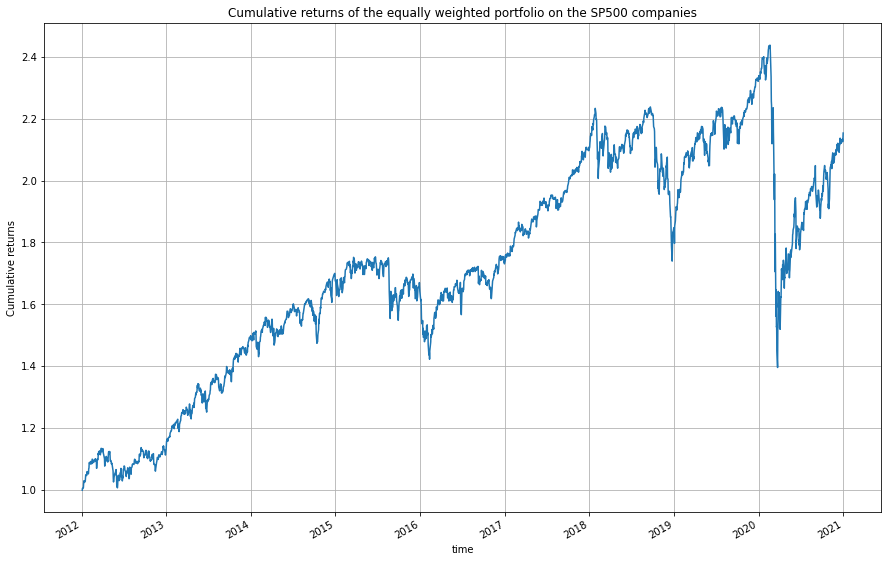

In [2]:
equal = portfolio()
equal.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the equally weighted portfolio on the SP500 companies", figsize=(15, 10)) 

# Market weights

In [3]:
from portfolios.market_weights import MarketWeighted



portfolio = MarketWeighted(configuration)


Loading library list...
Done
      permco ticker
0     8045.0   ORCL
1     8048.0   MSFT
2     8087.0   TROW
3    22168.0    HON
4    20207.0    ADM
..       ...    ...
406  52983.0      V
407  52985.0    AWK
408  52996.0    FRC
409   7267.0    UNH
410  47011.0  DISCK

[411 rows x 2 columns]


<AxesSubplot:title={'center':'Cumulative returns of the market weighted portfolio on the SP500 companies'}, xlabel='time', ylabel='Cumulative returns'>

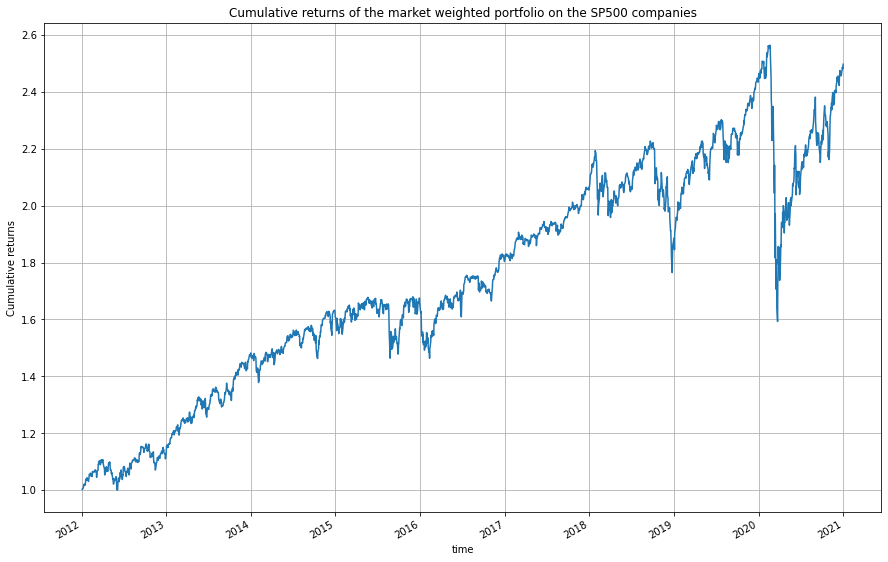

In [4]:
market = portfolio()
market.plot(grid=True, ylabel="Cumulative returns", xlabel="time", title="Cumulative returns of the market weighted portfolio on the SP500 companies", figsize=(15, 10))

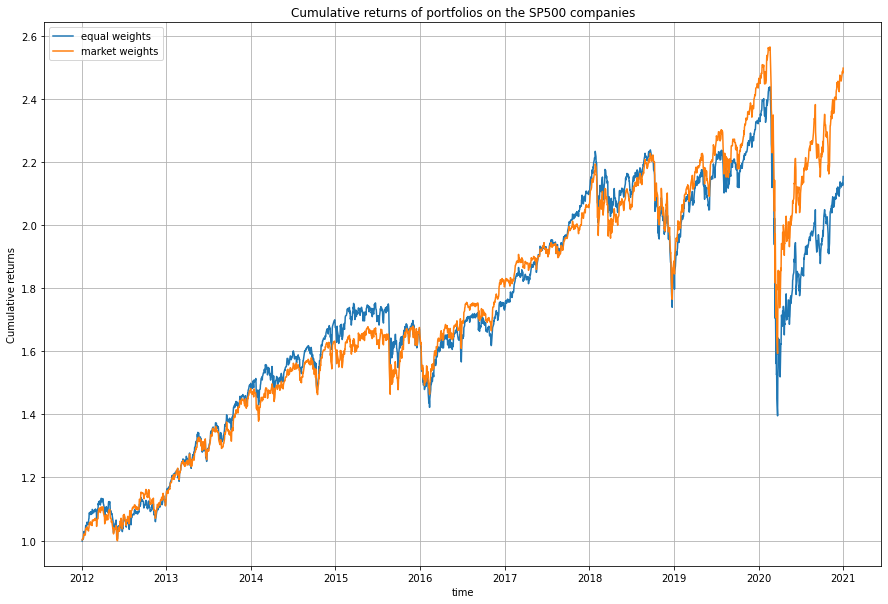

In [7]:
import matplotlib.pyplot as plt 



plt.plot(equal, label="equal weights")
plt.plot(market, label="market weights")
plt.xlabel("time")
plt.ylabel("Cumulative returns")
plt.title("Cumulative returns of portfolios on the SP500 companies")
plt.grid()
plt.legend()
plt.rcParams["figure.figsize"] = (15, 10)


# Reinforcement Learning

In [ ]:
from portfolios.reinforcement_learning.agent import Agent
from portfolios.reinforcement_learning.environment import MarketEnviorment



